### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

### Getting the data

In [2]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42))

poly_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

### Defining a function to plot the decision boundary

In [3]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

### Plotting the decision boundary for Degree 3 polnomial SVM Classifier

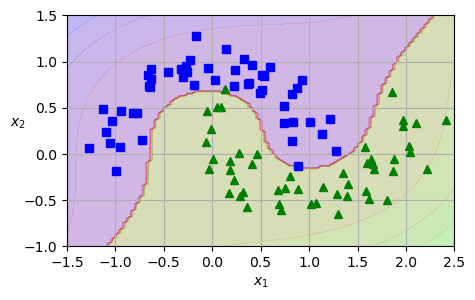

In [4]:
plt.figure(figsize=(5,3))
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### SVM Classifier with a Polynomial Kernel

In [5]:
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [6]:
poly100_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=10, coef0=100, C=5))

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

### Comparison of Polynomial SVM classifiers with different degrees

Text(0, 0.5, '')

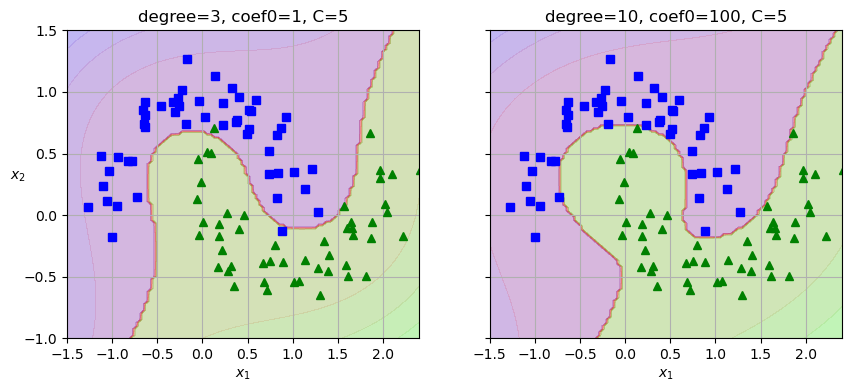

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

### Using an RBF kernel in the SVM classifier

In [8]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=0.1, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

rbf_0_1_1000_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=0.1, C=1000))
rbf_0_1_1000_kernel_svm_clf.fit(X, y)

rbf_5_0_001_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001))
rbf_5_0_001_kernel_svm_clf.fit(X, y)

rbf_5_1000_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=1000))
rbf_5_1000_kernel_svm_clf.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=5))])

### Comparison of SVM Classifiers with RBF kernel

<Figure size 640x480 with 0 Axes>

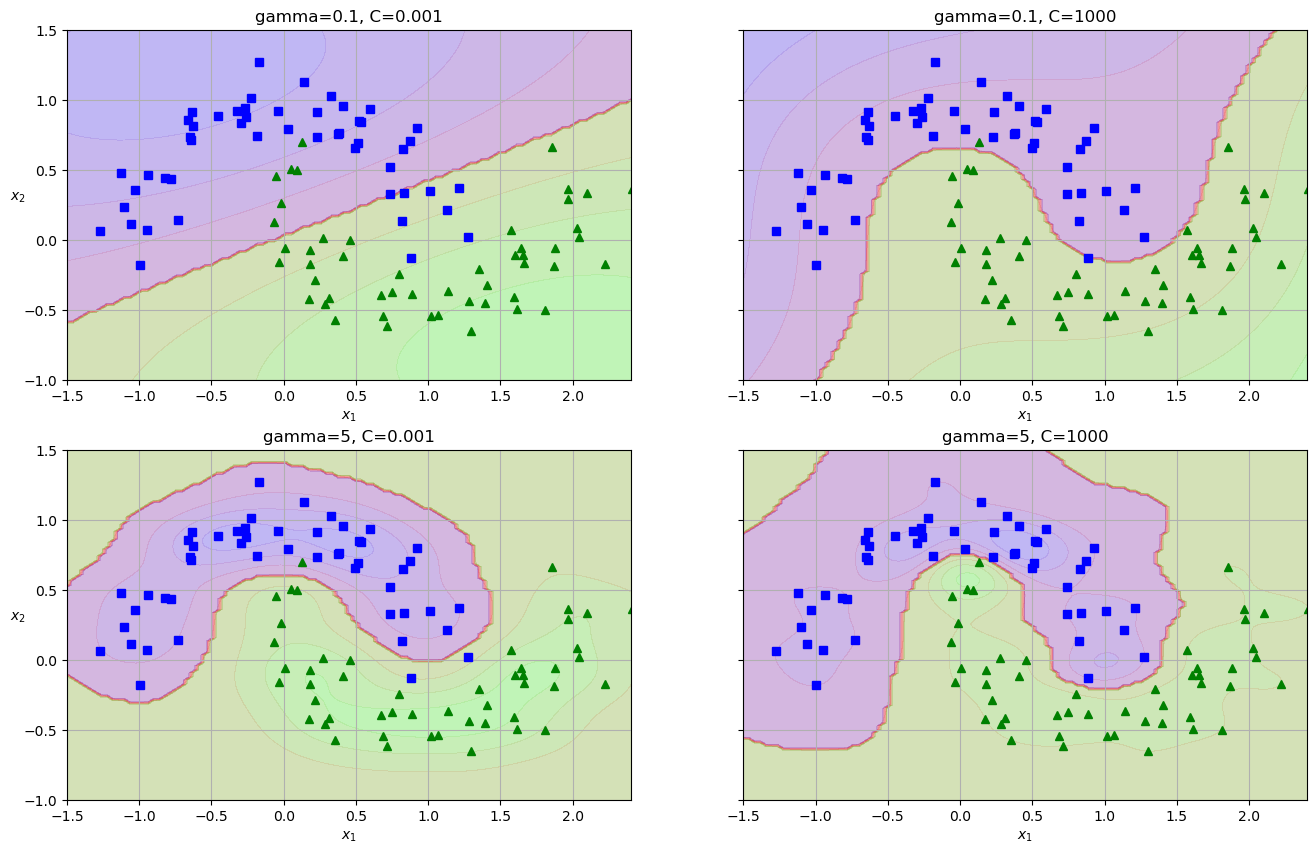

In [9]:
plt.clf()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), sharey=True)

plt.sca(axes[0][0])
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("gamma=0.1, C=0.001")

plt.sca(axes[0][1])
plot_predictions(rbf_0_1_1000_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("gamma=0.1, C=1000")
plt.ylabel("")

plt.sca(axes[1][0])
plot_predictions(rbf_5_0_001_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("gamma=5, C=0.001")

plt.sca(axes[1][1])
plot_predictions(rbf_5_1000_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("gamma=5, C=1000")
plt.ylabel("")

plt.show()